In [1]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

import calendar
from datetime import datetime

In [2]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
sns.set(style="whitegrid")

In [3]:
dfZP = pd.read_csv('../data/train.csv')

# Definición de funciones y nuevas columnas a utilizar

## Columna cantidad total de Amenities

In [4]:
dfZP['cantidad_amenities'] = dfZP['gimnasio'] + dfZP['piscina'] + dfZP['usosmultiples']

## Función porcentaje

In [5]:
def porcentaje(x):
    return round(x.mean() * 100, 2)

# A continuación se hará un análisis con respecto a los Amenities y a otras características de las propiedades en venta	

## Amenities

### Gimnasio

Primero vamos a ver la cantidad de nulos que tiene la columna.

In [6]:
dfZP['gimnasio'].isnull().sum()

0

Luego observamos los distintos valores que tiene la columna ***Gimnasio*** en nuestro DataFrame.

In [7]:
dfZP['gimnasio'].value_counts()

0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

Como los valores posibles son 0 y 1, podemos convertir dicha columna a tipo booleano.
Podemos ver que a los valores que antes tenían 0 como valor, ahora son *Falsos*, mientras que es *True* si anteriormente el valor era 1.

In [8]:
dfZP['gimnasio'] = dfZP['gimnasio'].astype(bool)

In [9]:
dfZP['gimnasio'].value_counts()

False    225006
True      14994
Name: gimnasio, dtype: int64

#### Cantidad de publicaciones

En un primer momento, vemos que hay una diferencia bastante considerable entre aquellas publicaciones que cuentan con gimnasio y cuales no. 
Más del 90% de las propiedades que se encuentran publicadas no poseen gimnasio.

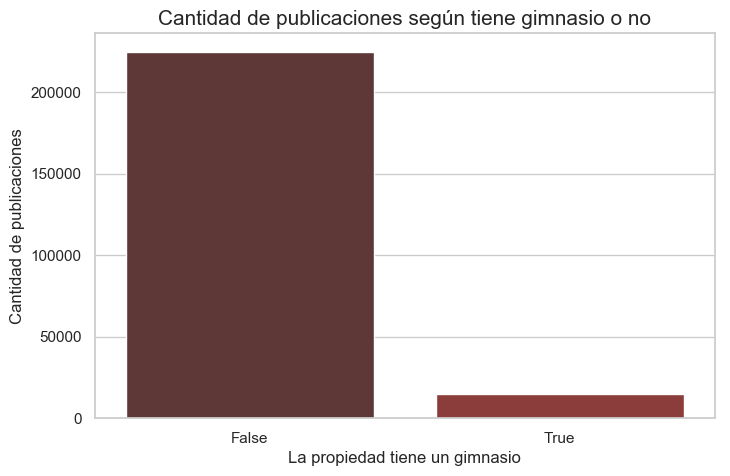

In [10]:
serie_publicacion_per_gimnasio = dfZP['gimnasio'].value_counts()

g = sns.barplot(y=serie_publicacion_per_gimnasio.values, x=serie_publicacion_per_gimnasio.index, \
                palette=sns.color_palette("Reds_d"));
g.set_title('Cantidad de publicaciones según tiene gimnasio o no', fontsize=15);
g.set_xlabel('La propiedad tiene un gimnasio');
g.set_ylabel('Cantidad de publicaciones');   

#### Precio promedio

Ahora vamos a analizar como varía el precio de la propiedad según si cuentan con un espacio para realizar ejercicio.

In [11]:
avgprecio_per_gimnasio = dfZP.groupby('gimnasio').agg({'precio' : ['mean', 'max', 'min']})
avgprecio_per_gimnasio

precio                      
                  mean         max       min
gimnasio                                    
False     2.445322e+06  12525000.0  310000.0
True      3.814127e+06  12515000.0  310000.0

Tanto en la tabla anterior como en el gráfico que se encuentra a continuación, podemos ver que, en promedio, aquellas propiedades que poseen gimnasio cuestan más. 
Siendo una diferencia de más de 1.000.000 de pesos mexicanos.

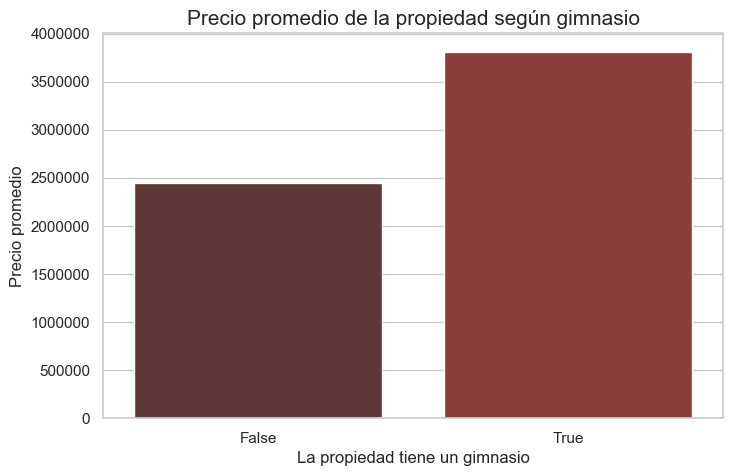

In [12]:
g = sns.barplot(x=avgprecio_per_gimnasio.index, y=avgprecio_per_gimnasio['precio']['mean'].values, \
                palette=sns.color_palette("Reds_d"));
g.set_title('Precio promedio de la propiedad según gimnasio', fontsize=15);
g.set_xlabel('La propiedad tiene un gimnasio');
g.set_ylabel('Precio promedio');  

#### Tipo de Propiedad

In [13]:
per_gimnasio = dfZP.loc[dfZP['gimnasio'] == True]
per_gimnasio['tipodepropiedad'].value_counts()

Apartamento                7591
Casa                       6105
Casa en condominio         1262
Departamento Compartido      34
Terreno                       1
Oficina comercial             1
Name: tipodepropiedad, dtype: int64

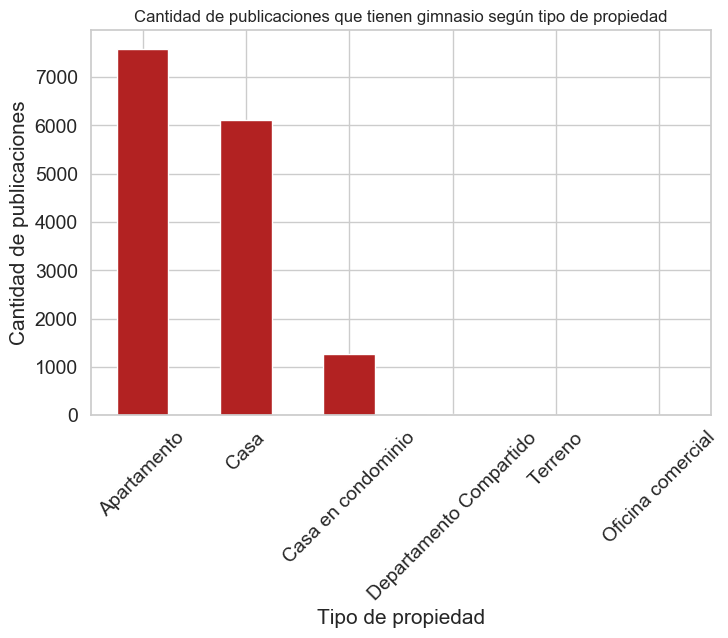

In [14]:
#g = sns.barplot(y=per_gimnasio['tipodepropiedad'].value_counts().values, x=per_gimnasio['tipodepropiedad'].value_counts().index, \
#                palette=sns.color_palette("Reds_d"));

#g.set_title('Cantidad de publicaciones que tienen gimnasio según tipo de propiedad', fontsize=15);
#g.set_xlabel('Tipo de propiedad');
#g.set_ylabel('Cantidad de publicaciones');

per_gimnasio['tipodepropiedad'].value_counts().plot(kind='bar',figsize=(8,5),fontsize=14,rot=45, color='firebrick')
plt.title('Cantidad de publicaciones que tienen gimnasio según tipo de propiedad')
plt.ylabel("Cantidad de publicaciones", size=15)
plt.xlabel("Tipo de propiedad", size=15)
plt.show()


In [15]:
per_no_gimnasio = dfZP.loc[dfZP['gimnasio'] == False]
per_no_gimnasio['tipodepropiedad'].value_counts()

Casa                             135612
Apartamento                       49750
Casa en condominio                18035
Terreno                            9944
Local Comercial                    3055
Oficina comercial                  1740
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Otros                               134
Departamento Compartido             107
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

In [16]:
porcentaje_gimnasio_gb_tipo = dfZP.groupby('tipodepropiedad').agg({'gimnasio' : porcentaje}).reset_index()
porcentaje_gimnasio_gb_tipo

,tipodepropiedad,gimnasio
0,Apartamento,13.24
1,Bodega comercial,0.00
2,Casa,4.31
3,Casa en condominio,6.54
4,Casa uso de suelo,0.00
5,Departamento Compartido,24.11
6,Duplex,0.00
7,Edificio,0.00
8,Garage,0.00
9,Hospedaje,0.00


In [17]:
porcentaje_gimnasio_mayor_a_1 = porcentaje_gimnasio_gb_tipo.loc[porcentaje_gimnasio_gb_tipo['gimnasio'] > 1].\
                                sort_values(['gimnasio'], ascending=[False])
porcentaje_gimnasio_mayor_a_1

,tipodepropiedad,gimnasio
5,Departamento Compartido,24.11
0,Apartamento,13.24
3,Casa en condominio,6.54
2,Casa,4.31


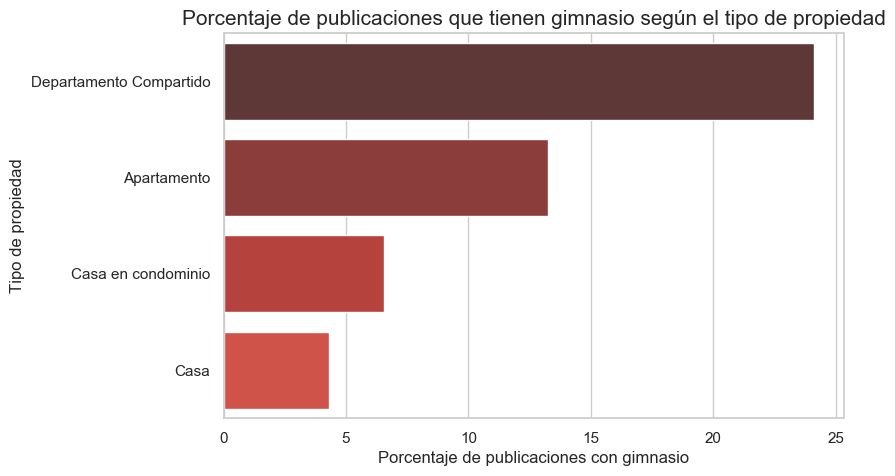

In [18]:
g = sns.barplot(x=porcentaje_gimnasio_mayor_a_1['gimnasio'], y=porcentaje_gimnasio_mayor_a_1['tipodepropiedad'], \
                palette=sns.color_palette("Reds_d"));

g.set_title('Porcentaje de publicaciones que tienen gimnasio según el tipo de propiedad', fontsize=15);
g.set_ylabel('Tipo de propiedad');
g.set_xlabel('Porcentaje de publicaciones con gimnasio');

#### Ciudad

In [19]:
per_gimnasio['ciudad'].value_counts()

Huixquilucan                       1571
Alvaro Obregón                      945
Miguel Hidalgo                      876
Zapopan                             726
Cuajimalpa de Morelos               711
Querétaro                           690
Mérida                              630
Benito Juárez                       623
San Andrés Cholula                  469
Monterrey                           447
Cancún                              435
Acapulco de Juárez                  428
Cuauhtémoc                          404
Naucalpan de Juárez                 365
Tlajomulco de Zúñiga                303
Atizapán de Zaragoza                288
Coyoacán                            236
Guadalajara                         234
Tlalpan                             226
Metepec                             215
Cuernavaca                          198
San Luis Potosí                     176
Puebla                              158
San Pedro Garza García              157
Corregidora                         122


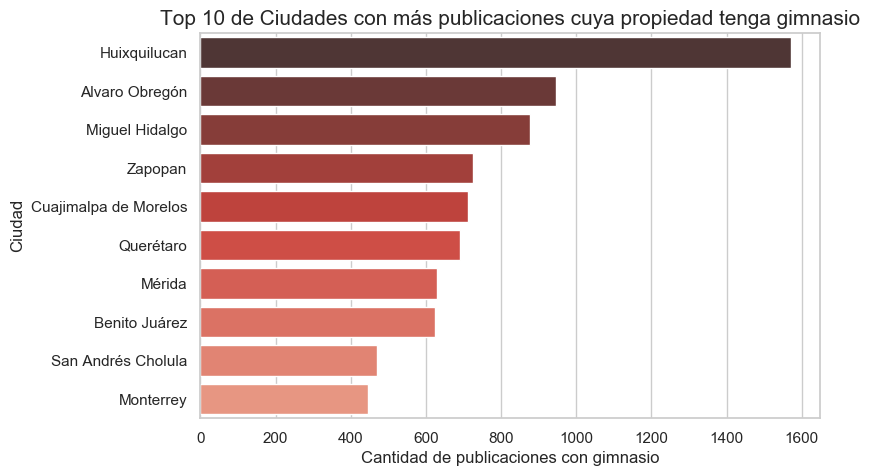

In [20]:
g = sns.barplot(y=per_gimnasio['ciudad'].value_counts().head(10).index, x=per_gimnasio['ciudad'].value_counts().head(10), \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Top 10 de Ciudades con más publicaciones cuya propiedad tenga gimnasio', fontsize=15);
g.set_xlabel('Cantidad de publicaciones con gimnasio');
g.set_ylabel('Ciudad');

In [21]:
porcentaje_gimnasio_gb_ciudad = dfZP.groupby('ciudad').agg({'gimnasio' : [porcentaje, 'sum']}).reset_index()
level0 = porcentaje_gimnasio_gb_ciudad.columns.get_level_values(0)
level1 = porcentaje_gimnasio_gb_ciudad.columns.get_level_values(1)
porcentaje_gimnasio_gb_ciudad.columns = level0 + '_' + level1
porcentaje_gimnasio_gb_ciudad_top10 =porcentaje_gimnasio_gb_ciudad.loc[porcentaje_gimnasio_gb_ciudad['gimnasio_sum'] >= 10].\
    sort_values(['gimnasio_porcentaje'], ascending=[False]).head(10)
porcentaje_gimnasio_gb_ciudad_top10

,ciudad_,gimnasio_porcentaje,gimnasio_sum
427,Monclova,29.41,10.0
310,Huixquilucan,27.47,1571.0
206,Cuajimalpa de Morelos,23.54,711.0
858,Zihuatanejo de Azueta,19.44,28.0
6,Acapulco de Juárez,17.44,428.0
417,Miguel Hidalgo,15.12,876.0
37,Alvaro Obregón,14.25,945.0
555,San Andrés Cholula,12.33,469.0
380,Lerma,11.76,54.0
36,Alvarado,11.60,108.0


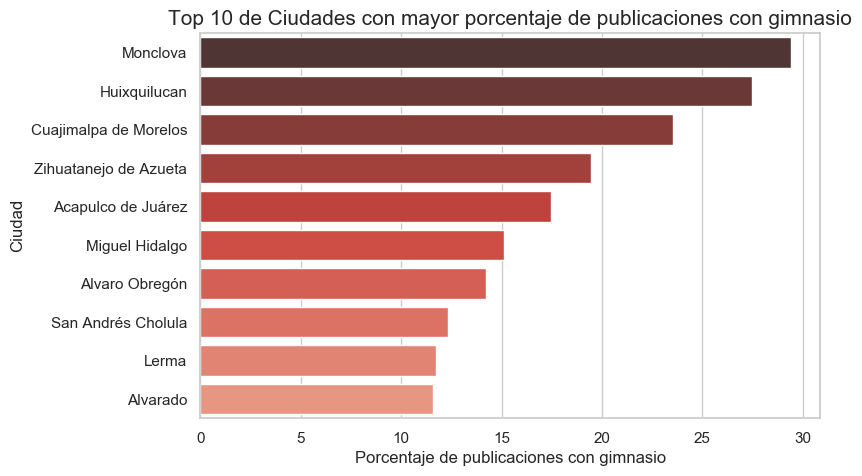

In [22]:
g = sns.barplot(y=porcentaje_gimnasio_gb_ciudad_top10['ciudad_'], x=porcentaje_gimnasio_gb_ciudad_top10['gimnasio_porcentaje'], \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Top 10 de Ciudades con mayor porcentaje de publicaciones con gimnasio', fontsize=15);
g.set_xlabel('Porcentaje de publicaciones con gimnasio');
g.set_ylabel('Ciudad');

#### Antiguedad

In [23]:
per_gimnasio['antiguedad'].value_counts()

0.0     4400
5.0     2819
1.0     1311
10.0    1155
4.0      935
3.0      701
2.0      616
20.0     483
6.0      280
11.0     143
21.0     107
7.0       98
8.0       85
15.0      76
12.0      63
30.0      41
9.0       41
25.0      29
18.0      21
14.0      18
22.0      18
17.0      16
16.0      15
13.0      14
40.0      12
35.0      10
19.0       9
26.0       8
50.0       7
51.0       6
28.0       6
27.0       5
23.0       5
60.0       4
24.0       3
31.0       2
33.0       2
29.0       2
80.0       1
34.0       1
42.0       1
37.0       1
38.0       1
Name: antiguedad, dtype: int64

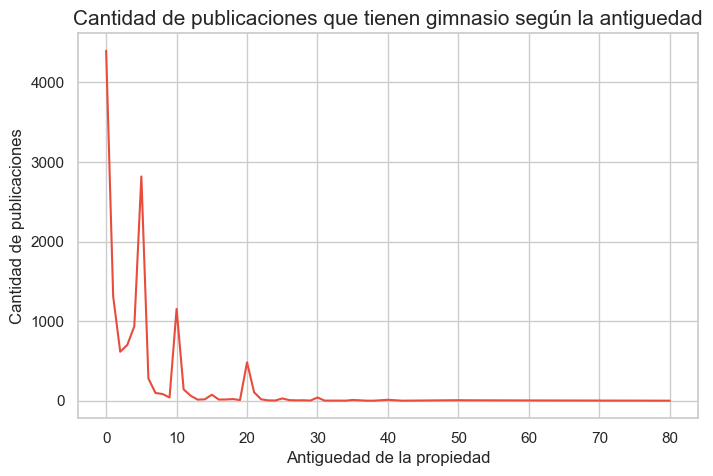

In [24]:
g = sns.lineplot(y=per_gimnasio['antiguedad'].value_counts(), x=per_gimnasio['antiguedad'].value_counts().index, color="#e74c3c");

g.set_title('Cantidad de publicaciones que tienen gimnasio según la antiguedad', fontsize=15);
g.set_xlabel('Antiguedad de la propiedad');
g.set_ylabel('Cantidad de publicaciones');

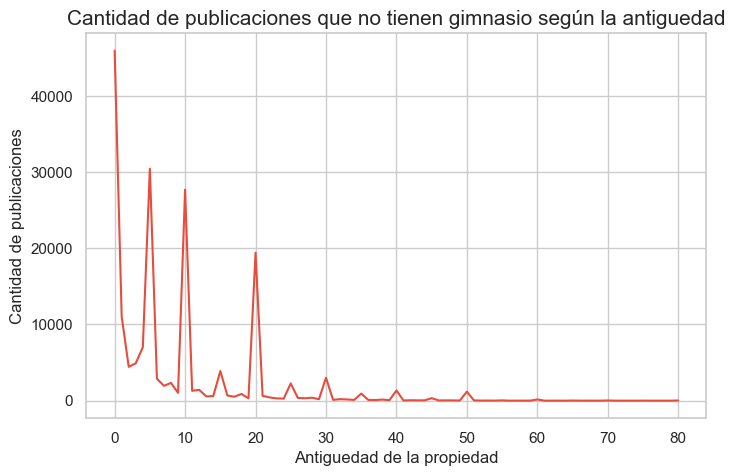

In [25]:
g = sns.lineplot(y=per_no_gimnasio['antiguedad'].value_counts(), x=per_no_gimnasio['antiguedad'].value_counts().index, color="#e74c3c");

g.set_title('Cantidad de publicaciones que no tienen gimnasio según la antiguedad', fontsize=15);
g.set_xlabel('Antiguedad de la propiedad');
g.set_ylabel('Cantidad de publicaciones');

### Piscina

In [26]:
dfZP['piscina'].isnull().sum()

0

In [27]:
dfZP['piscina'].value_counts()

0.0    219028
1.0     20972
Name: piscina, dtype: int64

In [28]:
dfZP['piscina'] = dfZP['piscina'].astype(bool)
dfZP['piscina'].value_counts()

False    219028
True      20972
Name: piscina, dtype: int64

#### Cantidad de publicaciones

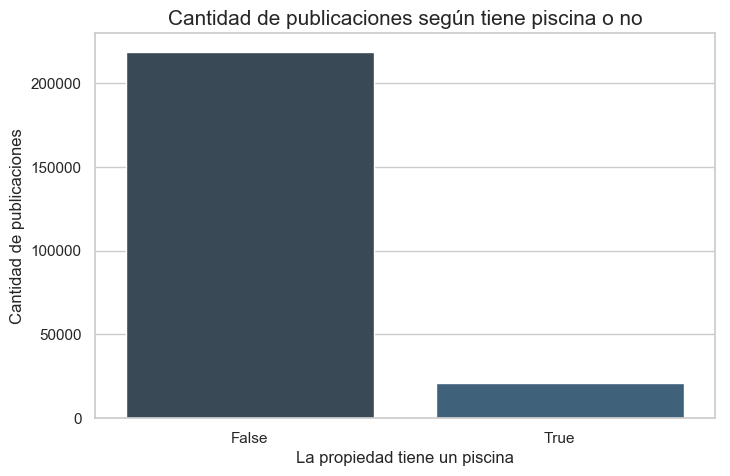

In [29]:
serie_publicacion_per_piscina = dfZP['piscina'].value_counts()

g = sns.barplot(y=serie_publicacion_per_piscina.values, x=serie_publicacion_per_piscina.index, \
                palette=sns.color_palette("Blues_d"));
g.set_title('Cantidad de publicaciones según tiene piscina o no', fontsize=15);
g.set_xlabel('La propiedad tiene un piscina');
g.set_ylabel('Cantidad de publicaciones');  

#### Precio promedio

In [30]:
avgprecio_per_piscina = dfZP.groupby('piscina').agg({'precio' : ['mean', 'max', 'min']})
avgprecio_per_piscina

precio                      
                 mean         max       min
piscina                                    
False    2.455764e+06  12525000.0  310000.0
True     3.314903e+06  12500000.0  310000.0

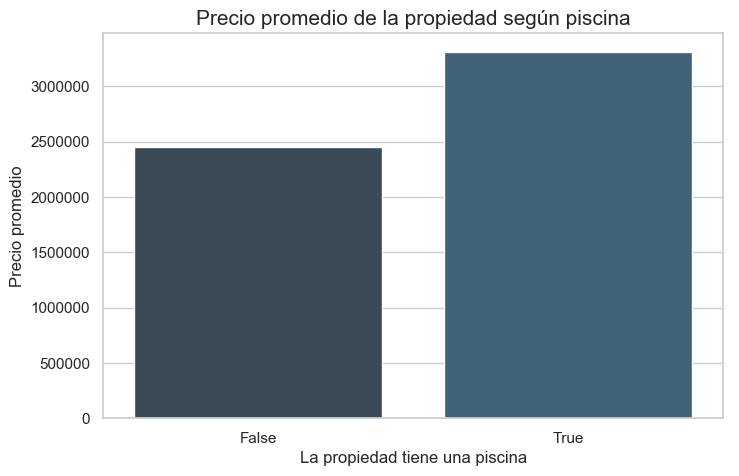

In [31]:
g = sns.barplot(x=avgprecio_per_piscina.index, y=avgprecio_per_piscina['precio']['mean'].values, \
                palette=sns.color_palette("Blues_d"));
g.set_title('Precio promedio de la propiedad según piscina', fontsize=15);
g.set_xlabel('La propiedad tiene una piscina');
g.set_ylabel('Precio promedio'); 

#### Tipo de Propiedad

In [32]:
per_piscina = dfZP.loc[dfZP['piscina'] == True]
per_piscina['tipodepropiedad'].value_counts()

Casa                       9109
Apartamento                8095
Casa en condominio         2973
Terreno                     489
Villa                       145
Quinta Vacacional           116
Departamento Compartido      26
Rancho                       14
Terreno comercial             2
Oficina comercial             1
Edificio                      1
Name: tipodepropiedad, dtype: int64

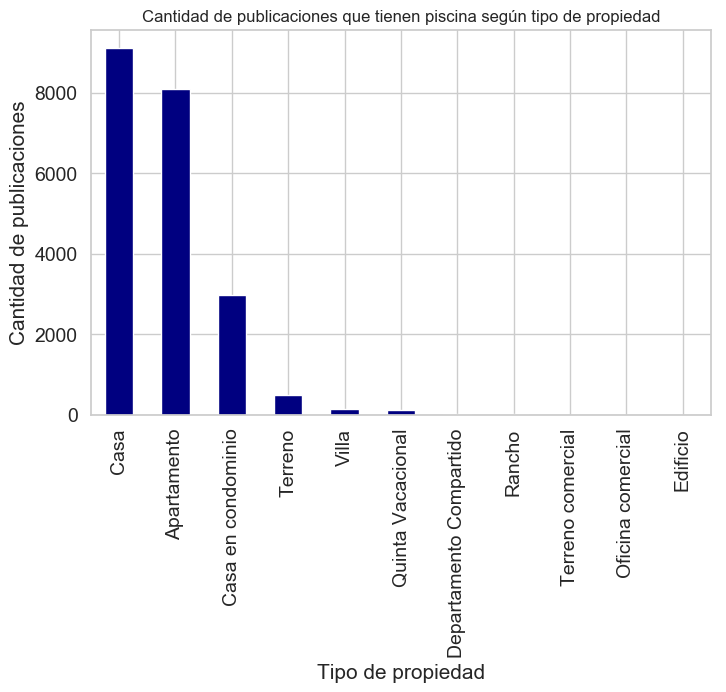

In [33]:
per_piscina['tipodepropiedad'].value_counts().plot(kind='bar',figsize=(8,5),fontsize=14,rot=90, color='navy')
plt.title('Cantidad de publicaciones que tienen piscina según tipo de propiedad')
plt.ylabel("Cantidad de publicaciones", size=15)
plt.xlabel("Tipo de propiedad", size=15)
plt.show()

In [34]:
porcentaje_piscina_gb_tipo = dfZP.groupby('tipodepropiedad').agg({'piscina' : porcentaje}).reset_index()
porcentaje_piscina_gb_tipo

,tipodepropiedad,piscina
0,Apartamento,14.12
1,Bodega comercial,0.00
2,Casa,6.43
3,Casa en condominio,15.41
4,Casa uso de suelo,0.00
5,Departamento Compartido,18.44
6,Duplex,0.00
7,Edificio,0.07
8,Garage,0.00
9,Hospedaje,0.00


In [35]:
porcentaje_piscina_tipo_mayor_a_1 = porcentaje_piscina_gb_tipo.loc[porcentaje_piscina_gb_tipo['piscina'] > 1]
porcentaje_piscina_tipo_mayor_a_1 = porcentaje_piscina_tipo_mayor_a_1.sort_values(['piscina'], ascending=[False])
porcentaje_piscina_tipo_mayor_a_1

,tipodepropiedad,piscina
23,Villa,42.65
18,Quinta Vacacional,29.37
5,Departamento Compartido,18.44
3,Casa en condominio,15.41
0,Apartamento,14.12
19,Rancho,8.24
2,Casa,6.43
20,Terreno,4.92


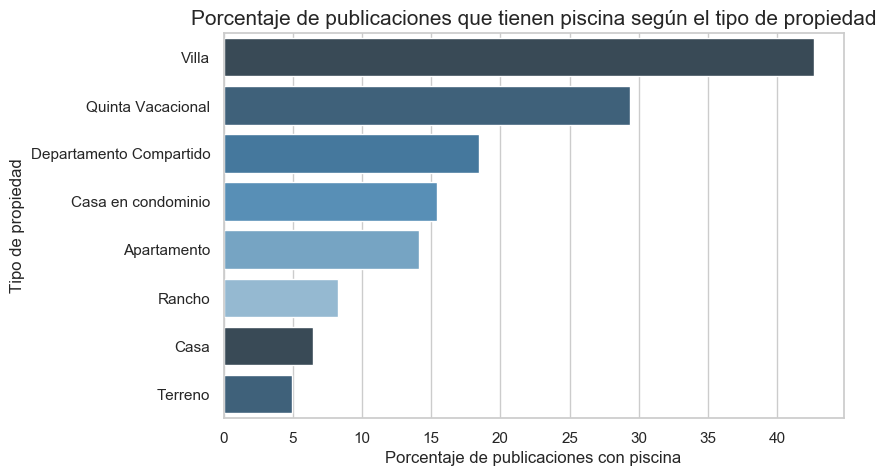

In [36]:
g = sns.barplot(x=porcentaje_piscina_tipo_mayor_a_1['piscina'], y=porcentaje_piscina_tipo_mayor_a_1['tipodepropiedad'], \
                palette=sns.color_palette("Blues_d"));

g.set_title('Porcentaje de publicaciones que tienen piscina según el tipo de propiedad', fontsize=15);
g.set_ylabel('Tipo de propiedad');
g.set_xlabel('Porcentaje de publicaciones con piscina');

#### Ciudad

In [37]:
per_piscina['ciudad'].value_counts()

Mérida                        1728
Huixquilucan                  1554
Acapulco de Juárez            1417
Querétaro                     1395
Cancún                        1362
Cuernavaca                    1202
Zapopan                       1165
Alvaro Obregón                 688
Tlajomulco de Zúñiga           674
Miguel Hidalgo                 609
Cuajimalpa de Morelos          547
Monterrey                      405
Yautepec                       361
Temixco                        353
Corregidora                    326
Guadalajara                    263
Puerto Vallarta                258
Benito Juárez                  257
Emiliano Zapata                257
Jiutepec                       224
San Pedro Garza García         223
Bahía de Banderas              218
Boca del Río                   209
Cuauhtémoc                     203
Atizapán de Zaragoza           202
San Andrés Cholula             199
Atlatlahucan                   196
Alvarado                       192
Playa del Carmen    

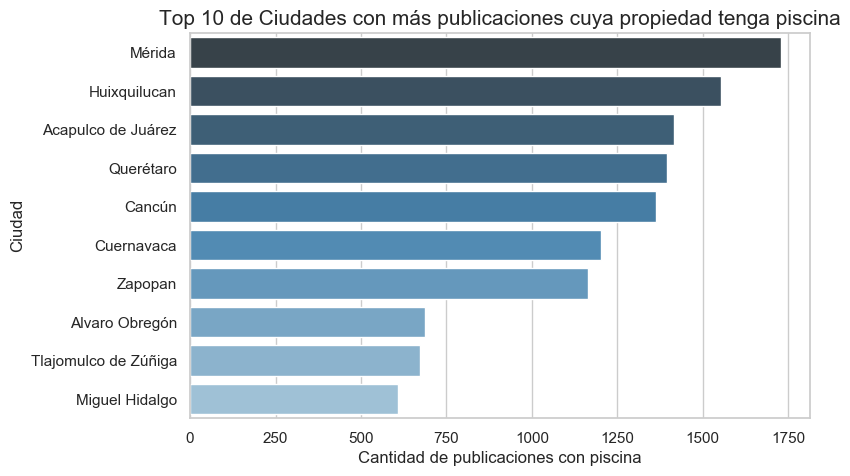

In [38]:
g = sns.barplot(y=per_piscina['ciudad'].value_counts().head(10).index, x=per_piscina['ciudad'].value_counts().head(10), \
                palette=sns.color_palette("Blues_d", 10));

g.set_title('Top 10 de Ciudades con más publicaciones cuya propiedad tenga piscina', fontsize=15);
g.set_xlabel('Cantidad de publicaciones con piscina');
g.set_ylabel('Ciudad');

In [39]:
porcentaje_piscina_gb_ciudad = dfZP.groupby('ciudad').agg({'piscina' : [porcentaje, 'sum']}).reset_index()
level0 = porcentaje_piscina_gb_ciudad.columns.get_level_values(0)
level1 = porcentaje_piscina_gb_ciudad.columns.get_level_values(1)
porcentaje_piscina_gb_ciudad.columns = level0 + '_' + level1
porcentaje_piscina_gb_ciudad_top10 = porcentaje_piscina_gb_ciudad.loc[porcentaje_piscina_gb_ciudad['piscina_sum'] >= 10].\
    sort_values(['piscina_porcentaje'], ascending=[False]).head(10)
porcentaje_piscina_gb_ciudad_top10

,ciudad_,piscina_porcentaje,piscina_sum
74,Atlatlahucan,67.82,196.0
858,Zihuatanejo de Azueta,59.03,85.0
832,Xochitepec,58.70,172.0
837,Yautepec,58.51,361.0
6,Acapulco de Juárez,57.74,1417.0
760,Tlayacapan,56.76,42.0
691,Temixco,54.22,353.0
693,Temozón,52.38,11.0
84,Ayala,51.35,38.0
249,Emiliano Zapata,50.10,257.0


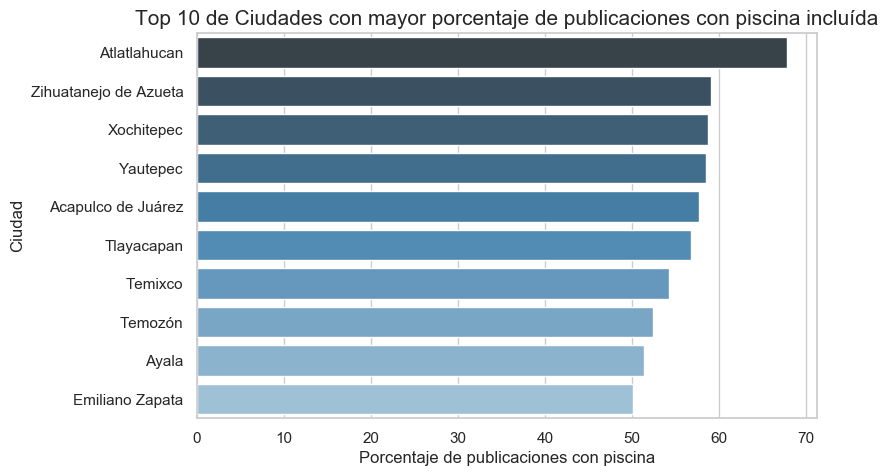

In [40]:
g = sns.barplot(y=porcentaje_piscina_gb_ciudad_top10['ciudad_'], x=porcentaje_piscina_gb_ciudad_top10['piscina_porcentaje'], \
                palette=sns.color_palette("Blues_d", 10));

g.set_title('Top 10 de Ciudades con mayor porcentaje de publicaciones con piscina incluída', fontsize=15);
g.set_xlabel('Porcentaje de publicaciones con piscina');
g.set_ylabel('Ciudad');

#### Antiguedad

In [41]:
per_piscina['antiguedad'].value_counts()

0.0     6683
5.0     3703
1.0     1974
10.0    1527
4.0     1296
3.0     1013
2.0      904
20.0     573
6.0      299
15.0     204
8.0      174
7.0      171
12.0      96
25.0      80
11.0      79
30.0      78
9.0       65
18.0      48
14.0      45
16.0      35
13.0      33
21.0      27
40.0      24
17.0      23
35.0      22
19.0      18
50.0      15
27.0      14
22.0      14
24.0       9
23.0       8
32.0       6
28.0       5
26.0       5
29.0       3
33.0       3
51.0       3
45.0       2
38.0       1
77.0       1
41.0       1
63.0       1
42.0       1
36.0       1
37.0       1
60.0       1
39.0       1
Name: antiguedad, dtype: int64

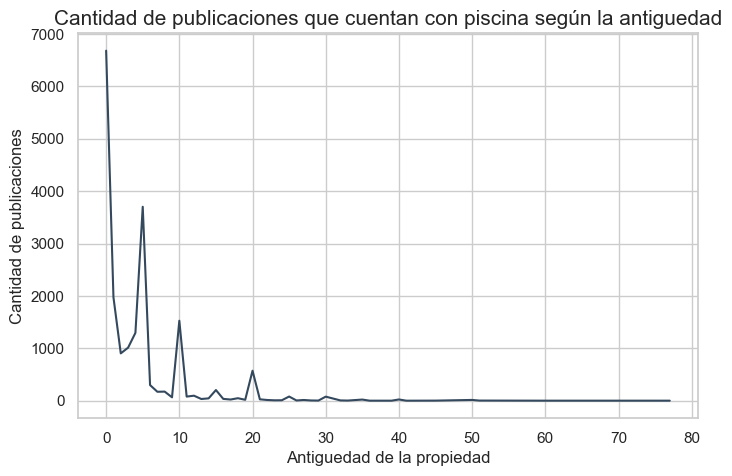

In [42]:
g = sns.lineplot(y=per_piscina['antiguedad'].value_counts(), x=per_piscina['antiguedad'].value_counts().index, color="#34495e");

g.set_title('Cantidad de publicaciones que cuentan con piscina según la antiguedad', fontsize=15);
g.set_xlabel('Antiguedad de la propiedad');
g.set_ylabel('Cantidad de publicaciones');

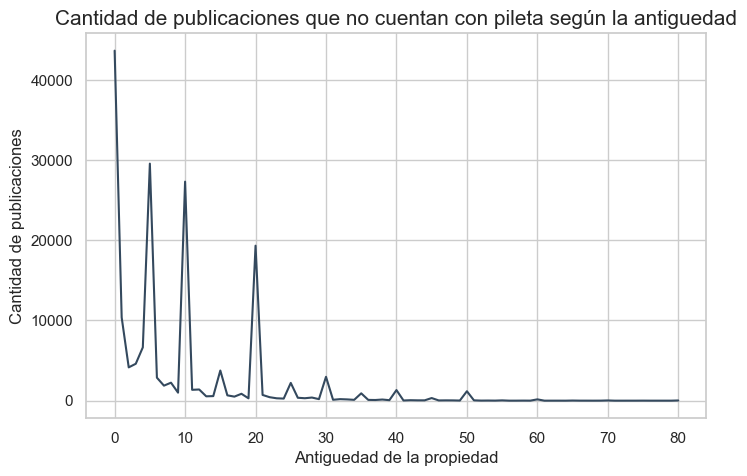

In [43]:
per_no_piscina = dfZP.loc[dfZP['piscina'] == False]

g = sns.lineplot(y=per_no_piscina['antiguedad'].value_counts(), x=per_no_piscina['antiguedad'].value_counts().index, color="#34495e");

g.set_title('Cantidad de publicaciones que no cuentan con pileta según la antiguedad', fontsize=15);
g.set_xlabel('Antiguedad de la propiedad');
g.set_ylabel('Cantidad de publicaciones');

### Usos Múltiples

In [44]:
dfZP['usosmultiples'].isnull().sum()

0

In [45]:
dfZP['usosmultiples'].value_counts()

0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64

In [46]:
dfZP['usosmultiples'] = dfZP['usosmultiples'].astype(bool)
dfZP['usosmultiples'].value_counts()

False    226778
True      13222
Name: usosmultiples, dtype: int64

#### Cantidad de publicaciones

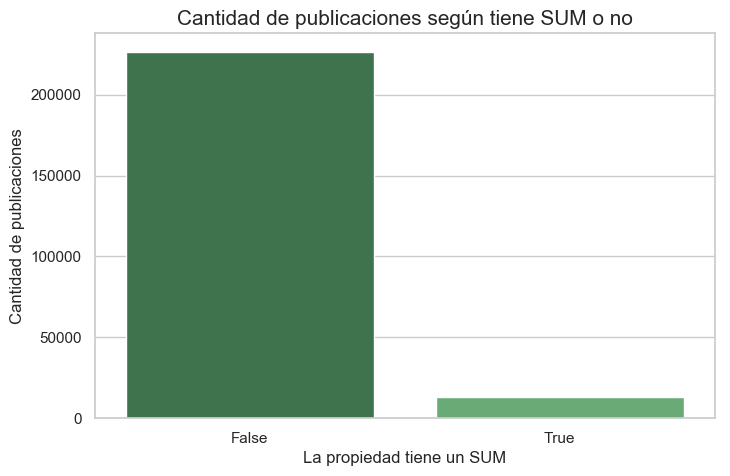

In [47]:
serie_publicacion_per_SUM = dfZP['usosmultiples'].value_counts()

g = sns.barplot(y=serie_publicacion_per_SUM.values, x=serie_publicacion_per_SUM.index, \
                palette=sns.color_palette("Greens_d", 2));
g.set_title('Cantidad de publicaciones según tiene SUM o no', fontsize=15);
g.set_xlabel('La propiedad tiene un SUM');
g.set_ylabel('Cantidad de publicaciones');

#### Precio promedio

In [48]:
avgprecio_per_SUM = dfZP.groupby('usosmultiples').agg({'precio' : ['mean', 'max', 'min']})
avgprecio_per_SUM

precio                      
                       mean         max       min
usosmultiples                                    
False          2.455262e+06  12525000.0  310000.0
True           3.827091e+06  12500000.0  310000.0

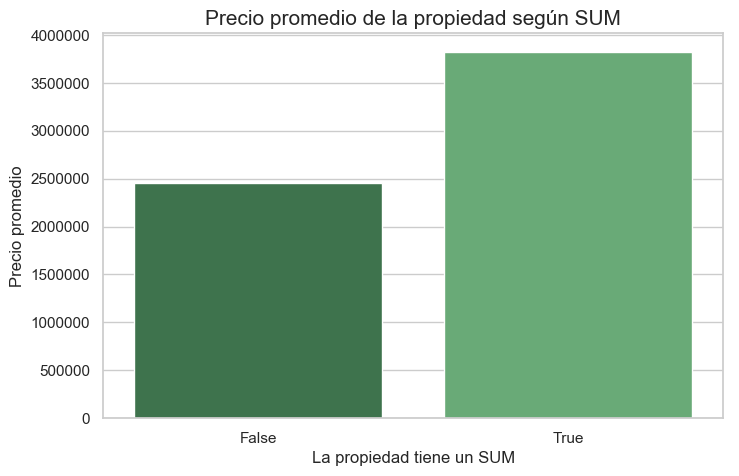

In [49]:
g = sns.barplot(x=avgprecio_per_SUM.index, y=avgprecio_per_SUM['precio']['mean'].values, \
                palette=sns.color_palette("Greens_d", 2));
g.set_title('Precio promedio de la propiedad según SUM', fontsize=15);
g.set_xlabel('La propiedad tiene un SUM');
g.set_ylabel('Precio promedio');

#### Tipo de Propiedad

In [50]:
per_SUM = dfZP.loc[dfZP['usosmultiples'] == True]
per_SUM['tipodepropiedad'].value_counts()

Apartamento                6187
Casa                       5099
Casa en condominio         1907
Departamento Compartido      26
Oficina comercial             2
Edificio                      1
Name: tipodepropiedad, dtype: int64

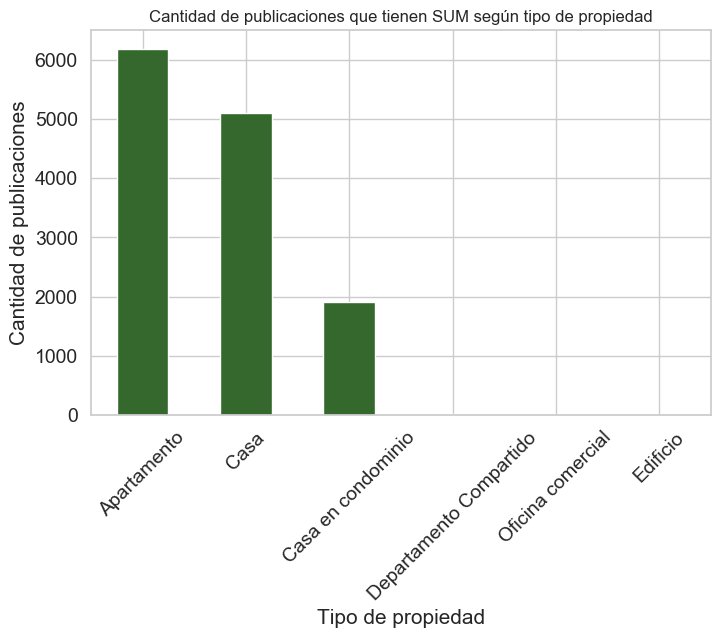

In [51]:
per_SUM['tipodepropiedad'].value_counts().plot(kind='bar',figsize=(8,5),fontsize=14,rot=45, color='#35682d')
plt.title('Cantidad de publicaciones que tienen SUM según tipo de propiedad')
plt.ylabel("Cantidad de publicaciones", size=15)
plt.xlabel("Tipo de propiedad", size=15)
plt.show()

In [52]:
per_no_SUM = dfZP.loc[dfZP['usosmultiples'] == False]
per_no_SUM['tipodepropiedad'].value_counts()

Casa                             136618
Apartamento                       51154
Casa en condominio                17390
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1739
Bodega comercial                   1406
Edificio                           1395
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Otros                               134
Departamento Compartido             115
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

In [53]:
porcentaje_SUM_gb_tipo = dfZP.groupby('tipodepropiedad').agg({'usosmultiples' : porcentaje}).reset_index()
porcentaje_SUM_gb_tipo
porcentaje_SUM_mayor_a_1 = porcentaje_SUM_gb_tipo.loc[porcentaje_SUM_gb_tipo['usosmultiples'] > 1].\
                           sort_values(['usosmultiples'], ascending=[False])
porcentaje_SUM_mayor_a_1 

,tipodepropiedad,usosmultiples
5,Departamento Compartido,18.44
0,Apartamento,10.79
3,Casa en condominio,9.88
2,Casa,3.60


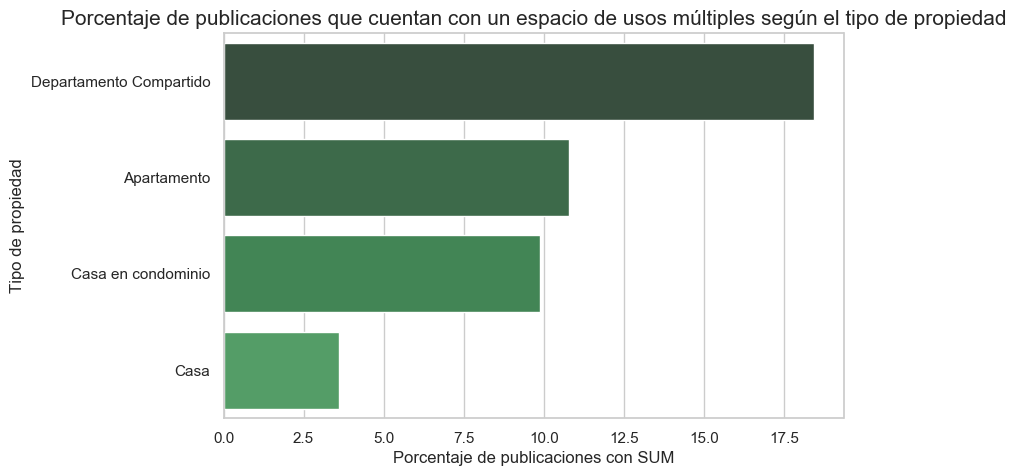

In [54]:
g = sns.barplot(x=porcentaje_SUM_mayor_a_1['usosmultiples'], y=porcentaje_SUM_mayor_a_1['tipodepropiedad'], \
                palette=sns.color_palette("Greens_d"));

g.set_title('Porcentaje de publicaciones que cuentan con un espacio de usos múltiples según el tipo de propiedad', fontsize=15);
g.set_ylabel('Tipo de propiedad');
g.set_xlabel('Porcentaje de publicaciones con SUM');

#### Ciudad

In [55]:
per_SUM['ciudad'].value_counts()

Huixquilucan                       1198
Zapopan                            1054
Querétaro                           843
Alvaro Obregón                      809
Benito Juárez                       622
Miguel Hidalgo                      607
Naucalpan de Juárez                 574
San Andrés Cholula                  540
Cuajimalpa de Morelos               530
Atizapán de Zaragoza                420
Tlajomulco de Zúñiga                408
Cuauhtémoc                          364
Tlalpan                             354
Acapulco de Juárez                  344
Cancún                              306
Coyoacán                            237
Monterrey                           236
Metepec                             215
Guadalajara                         200
Corregidora                         167
Tlalnepantla de Baz                 164
Puebla                              142
San Pedro Garza García              120
Cuernavaca                          120
Mérida                              113


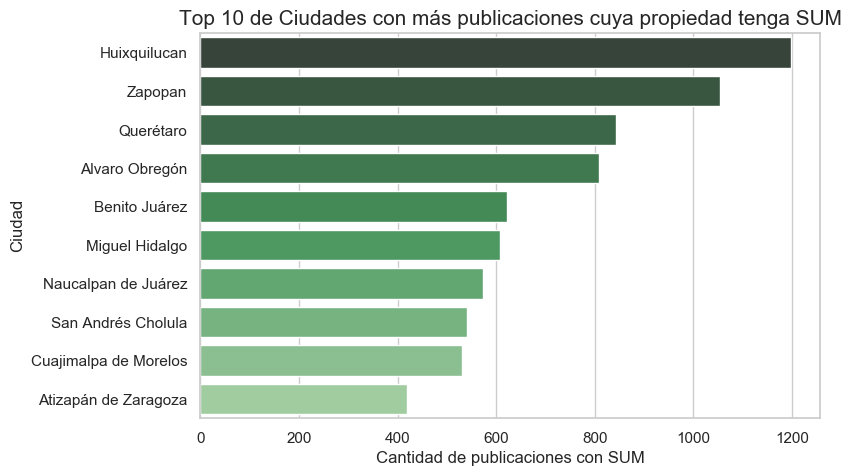

In [56]:
g = sns.barplot(y=per_SUM['ciudad'].value_counts().head(10).index, x=per_SUM['ciudad'].value_counts().head(10), \
                palette=sns.color_palette("Greens_d", 10));

g.set_title('Top 10 de Ciudades con más publicaciones cuya propiedad tenga SUM', fontsize=15);
g.set_xlabel('Cantidad de publicaciones con SUM');
g.set_ylabel('Ciudad');

In [57]:
porcentaje_SUM_gb_ciudad = dfZP.groupby('ciudad').agg({'usosmultiples' : [porcentaje, 'sum']}).reset_index()
level0 = porcentaje_SUM_gb_ciudad.columns.get_level_values(0)
level1 = porcentaje_SUM_gb_ciudad.columns.get_level_values(1)
porcentaje_SUM_gb_ciudad.columns = level0 + '_' + level1
porcentaje_SUM_gb_ciudad_top10 = porcentaje_SUM_gb_ciudad.loc[porcentaje_SUM_gb_ciudad['usosmultiples_sum'] >= 10].\
    sort_values(['usosmultiples_porcentaje'], ascending=[False]).head(10)
porcentaje_SUM_gb_ciudad_top10

,ciudad_,usosmultiples_porcentaje,usosmultiples_sum
310,Huixquilucan,20.95,1198.0
105,Calimaya,17.75,41.0
206,Cuajimalpa de Morelos,17.55,530.0
555,San Andrés Cholula,14.19,540.0
6,Acapulco de Juárez,14.02,344.0
858,Zihuatanejo de Azueta,13.19,19.0
745,Tlajomulco de Zúñiga,12.54,408.0
37,Alvaro Obregón,12.20,809.0
245,El Marqués,11.55,99.0
411,Metepec,10.77,215.0


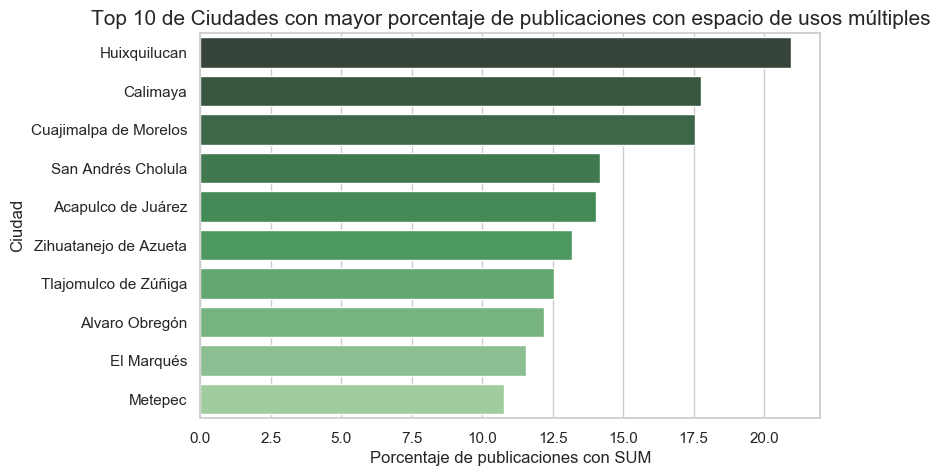

In [58]:
g = sns.barplot(y=porcentaje_SUM_gb_ciudad_top10['ciudad_'], x=porcentaje_SUM_gb_ciudad_top10['usosmultiples_porcentaje'], \
                palette=sns.color_palette("Greens_d", 10));

g.set_title('Top 10 de Ciudades con mayor porcentaje de publicaciones con espacio de usos múltiples', fontsize=15);
g.set_xlabel('Porcentaje de publicaciones con SUM');
g.set_ylabel('Ciudad');

#### Antiguedad

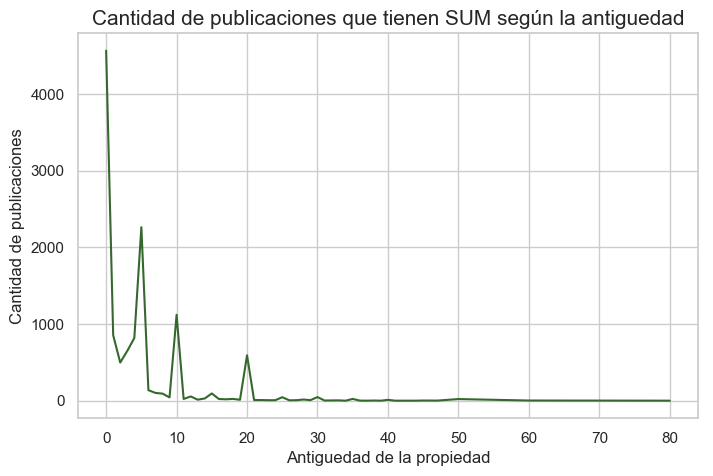

In [59]:
g = sns.lineplot(y=per_SUM['antiguedad'].value_counts(), x=per_SUM['antiguedad'].value_counts().index, color="#35682d");

g.set_title('Cantidad de publicaciones que tienen SUM según la antiguedad', fontsize=15);
g.set_xlabel('Antiguedad de la propiedad');
g.set_ylabel('Cantidad de publicaciones');

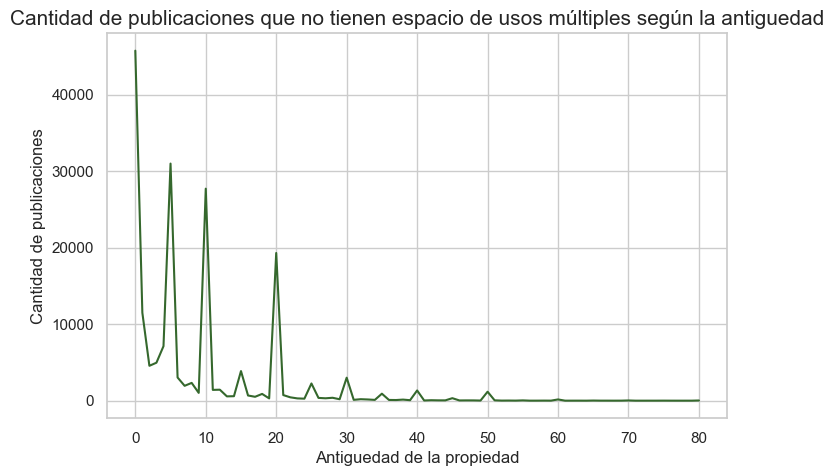

In [60]:
g = sns.lineplot(y=per_no_SUM['antiguedad'].value_counts(), x=per_no_SUM['antiguedad'].value_counts().index, color="#35682d");

g.set_title('Cantidad de publicaciones que no tienen espacio de usos múltiples según la antiguedad', fontsize=15);
g.set_xlabel('Antiguedad de la propiedad');
g.set_ylabel('Cantidad de publicaciones');

### Cantidad total de Amenities

In [61]:
dfZP['cantidad_amenities'].value_counts()

0.0    206412
1.0     22315
2.0      6946
3.0      4327
Name: cantidad_amenities, dtype: int64

#### Cantidad de publicaciones

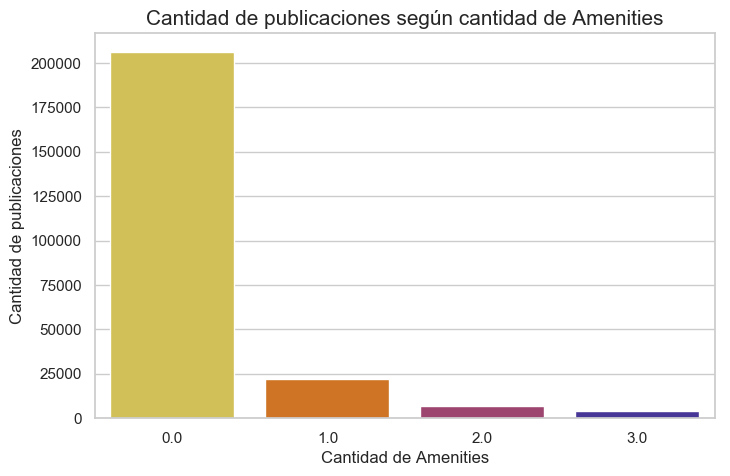

In [62]:
g = sns.barplot(y=dfZP['cantidad_amenities'].value_counts().values, x=dfZP['cantidad_amenities'].value_counts().index, \
                palette=sns.color_palette("CMRmap_r", 4));
g.set_title('Cantidad de publicaciones según cantidad de Amenities', fontsize=15);
g.set_xlabel('Cantidad de Amenities');
g.set_ylabel('Cantidad de publicaciones');  

#### Precio promedio

In [63]:
avg_cantidad_amenities = dfZP.groupby('cantidad_amenities').agg({'precio' : 'mean'}).reset_index()
avg_cantidad_amenities

,cantidad_amenities,precio
0,0.0,2.398349e+06
1,1.0,3.000142e+06
2,2.0,3.721913e+06
3,3.0,4.518758e+06


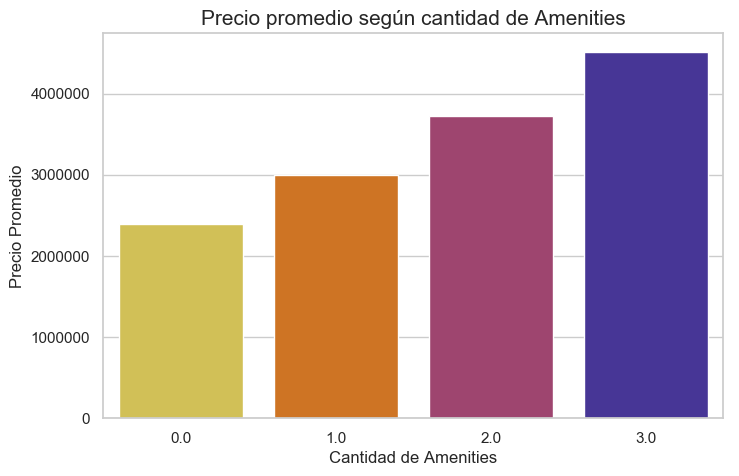

In [64]:
g = sns.barplot(x=avg_cantidad_amenities['cantidad_amenities'], y=avg_cantidad_amenities['precio'], \
                palette=sns.color_palette("CMRmap_r", 4));

g.set_title('Precio promedio según cantidad de Amenities', fontsize=15);
g.set_xlabel('Cantidad de Amenities');
g.set_ylabel('Precio Promedio');

## Otros Servicios

### Escuelas Cercanas

In [65]:
dfZP['escuelascercanas'].isnull().sum()

0

In [66]:
dfZP['escuelascercanas'].value_counts()

0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64

In [67]:
dfZP['escuelascercanas'] = dfZP['escuelascercanas'].astype(bool)
dfZP['escuelascercanas'].value_counts()

False    133406
True     106594
Name: escuelascercanas, dtype: int64

#### Cantidad de publicaciones

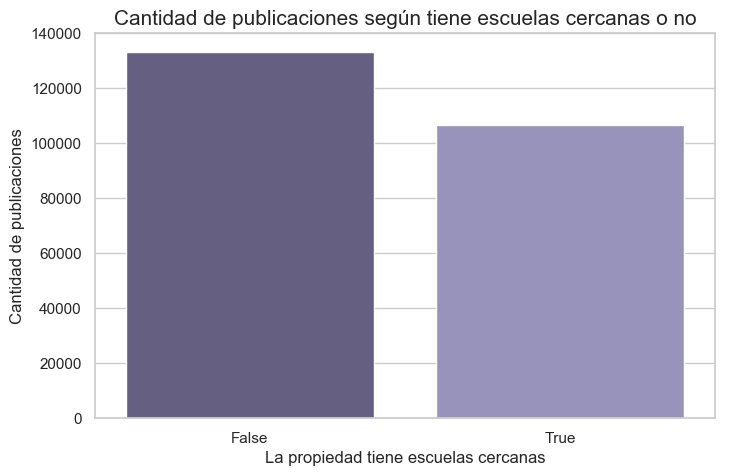

In [68]:
serie_publicacion_per_escuelas = dfZP['escuelascercanas'].value_counts()

g = sns.barplot(y=serie_publicacion_per_escuelas.values, x=serie_publicacion_per_escuelas.index, \
                palette=sns.color_palette("Purples_d", 2));
g.set_title('Cantidad de publicaciones según tiene escuelas cercanas o no', fontsize=15);
g.set_xlabel('La propiedad tiene escuelas cercanas');
g.set_ylabel('Cantidad de publicaciones'); 

#### Precio promedio

In [69]:
avgprecio_per_escuelas = dfZP.groupby('escuelascercanas').agg({'precio' : ['mean', 'max', 'min']})
avgprecio_per_escuelas

precio                      
                          mean         max       min
escuelascercanas                                    
False             2.528554e+06  12525000.0  310000.0
True              2.533698e+06  12521000.0  310000.0

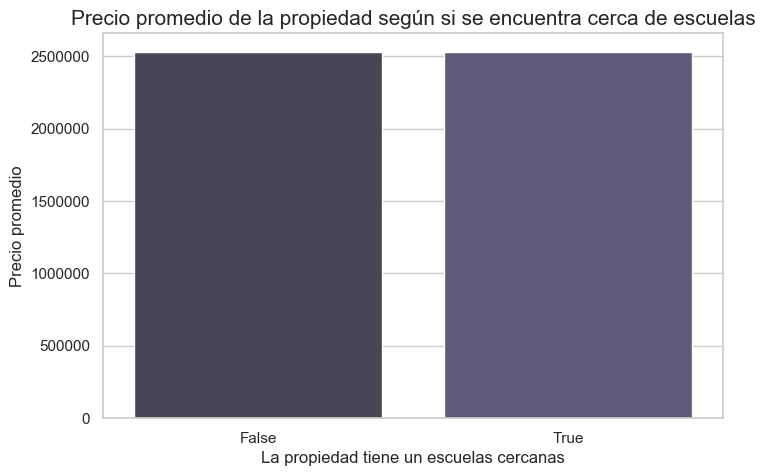

In [70]:
g = sns.barplot(x=avgprecio_per_escuelas.index, y=avgprecio_per_escuelas['precio']['mean'].values, \
                palette=sns.color_palette("Purples_d"));
g.set_title('Precio promedio de la propiedad según si se encuentra cerca de escuelas', fontsize=15);
g.set_xlabel('La propiedad tiene un escuelas cercanas');
g.set_ylabel('Precio promedio');  

#### Tipo de Propiedad

In [71]:
per_escuelas = dfZP.loc[dfZP['escuelascercanas'] == True]
per_escuelas['tipodepropiedad'].value_counts()

Casa                             64553
Apartamento                      26315
Casa en condominio                9624
Terreno                           3510
Local Comercial                    700
Edificio                           427
Oficina comercial                  419
Casa uso de suelo                  231
Bodega comercial                   220
Terreno comercial                  189
Inmuebles productivos urbanos       99
Departamento Compartido             86
Villa                               76
Local en centro comercial           67
Quinta Vacacional                   57
Rancho                              15
Duplex                               4
Huerta                               2
Name: tipodepropiedad, dtype: int64

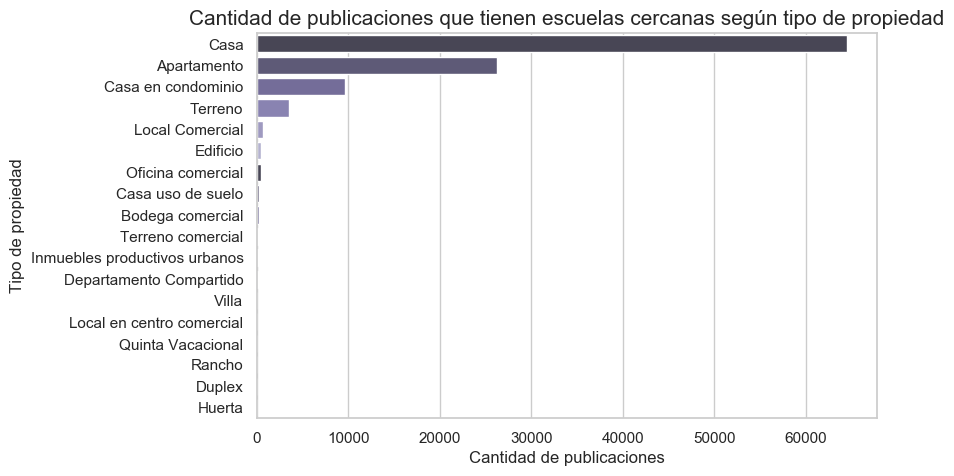

In [72]:
g = sns.barplot(y=per_escuelas['tipodepropiedad'].value_counts().index, x=per_escuelas['tipodepropiedad'].value_counts(), \
                palette=sns.color_palette("Purples_d"));

g.set_title('Cantidad de publicaciones que tienen escuelas cercanas según tipo de propiedad', fontsize=15);
g.set_xlabel('Cantidad de publicaciones');
g.set_ylabel('Tipo de propiedad');

In [73]:
porcentaje_escuelas_gb_tipo = dfZP.groupby('tipodepropiedad').agg({'escuelascercanas' : porcentaje}).reset_index()
porcentaje_escuelas_gb_tipo

,tipodepropiedad,escuelascercanas
0,Apartamento,45.89
1,Bodega comercial,15.65
2,Casa,45.55
3,Casa en condominio,49.87
4,Casa uso de suelo,32.63
5,Departamento Compartido,60.99
6,Duplex,1.17
7,Edificio,30.59
8,Garage,0.00
9,Hospedaje,0.00


In [74]:
porcentaje_escuelas_mayor_a_1 = porcentaje_escuelas_gb_tipo.loc[porcentaje_escuelas_gb_tipo['escuelascercanas'] > 1]
porcentaje_escuelas_mayor_a_1 = porcentaje_escuelas_mayor_a_1.sort_values(['escuelascercanas'], ascending=[False])
porcentaje_escuelas_mayor_a_1

,tipodepropiedad,escuelascercanas
5,Departamento Compartido,60.99
3,Casa en condominio,49.87
11,Inmuebles productivos urbanos,49.50
0,Apartamento,45.89
2,Casa,45.55
13,Local en centro comercial,40.61
20,Terreno,35.29
4,Casa uso de suelo,32.63
7,Edificio,30.59
16,Oficina comercial,24.07


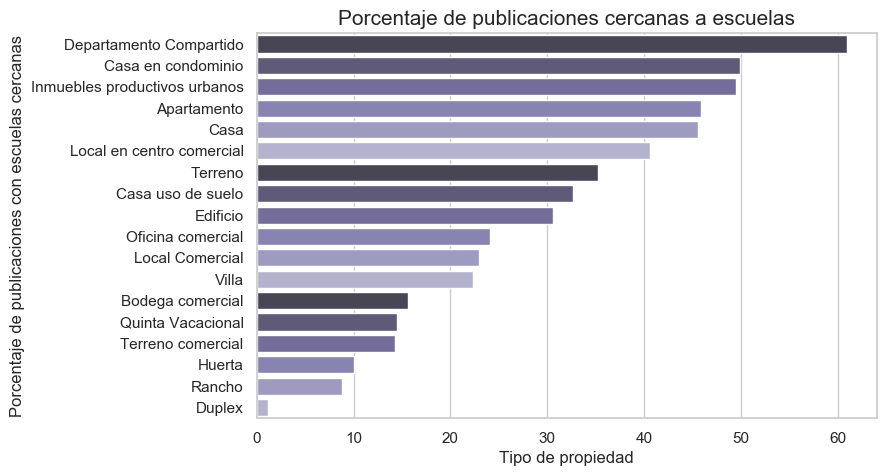

In [75]:
g = sns.barplot(y=porcentaje_escuelas_mayor_a_1['tipodepropiedad'], x=porcentaje_escuelas_mayor_a_1['escuelascercanas'], \
                palette=sns.color_palette("Purples_d"));

g.set_title('Porcentaje de publicaciones cercanas a escuelas', fontsize=15);
g.set_xlabel('Tipo de propiedad');
g.set_ylabel('Porcentaje de publicaciones con escuelas cercanas');

#### Ciudad

In [76]:
per_escuelas['ciudad'].value_counts()

Querétaro                      5941
Benito Juárez                  5297
Zapopan                        4959
Naucalpan de Juárez            3833
Atizapán de Zaragoza           3245
Alvaro Obregón                 3162
Mérida                         2975
Tlalpan                        2926
Cuauhtémoc                     2837
Huixquilucan                   2751
Coyoacán                       2715
Miguel Hidalgo                 2595
Puebla                         2292
Monterrey                      2124
San Andrés Cholula             2003
Cuautitlán Izcalli             1941
Tlalnepantla de Baz            1870
Guadalajara                    1781
Cancún                         1746
Cuajimalpa de Morelos          1627
Tlajomulco de Zúñiga           1621
Gustavo A. Madero              1498
Iztapalapa                     1491
Cuernavaca                     1364
San Luis Potosí                1346
Tijuana                        1319
Toluca                         1247
Corregidora                 

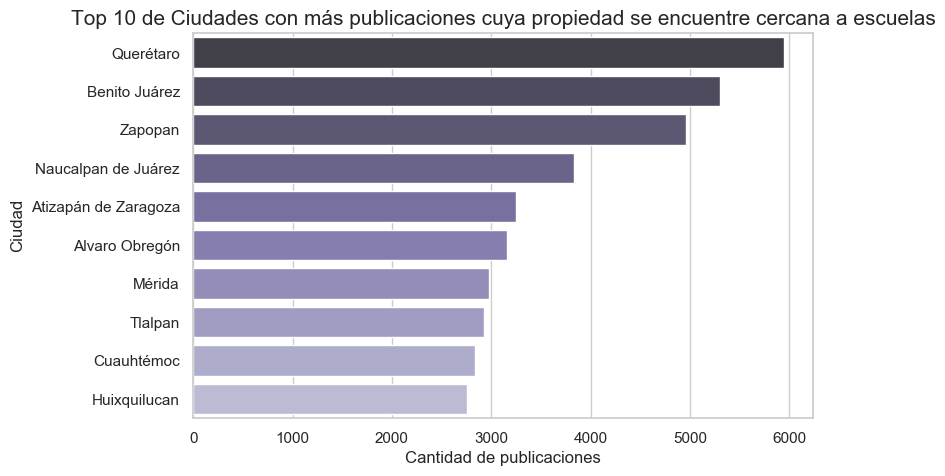

In [77]:
g = sns.barplot(y=per_escuelas['ciudad'].value_counts().head(10).index, x=per_escuelas['ciudad'].value_counts().head(10), \
                palette=sns.color_palette("Purples_d", 10));

g.set_title('Top 10 de Ciudades con más publicaciones cuya propiedad se encuentre cercana a escuelas', fontsize=15);
g.set_xlabel('Cantidad de publicaciones');
g.set_ylabel('Ciudad');

In [78]:
porcentaje_escuelas_gb_ciudad = dfZP.groupby('ciudad').agg({'escuelascercanas' : [porcentaje, 'sum']}).reset_index()
level0 = porcentaje_escuelas_gb_ciudad.columns.get_level_values(0)
level1 = porcentaje_escuelas_gb_ciudad.columns.get_level_values(1)
porcentaje_escuelas_gb_ciudad.columns = level0 + '_' + level1
porcentaje_escuelas_gb_ciudad_top10 = porcentaje_escuelas_gb_ciudad.loc[porcentaje_escuelas_gb_ciudad['escuelascercanas_sum'] >= 10].\
    sort_values(['escuelascercanas_porcentaje'], ascending=[False]).head(10)
porcentaje_escuelas_gb_ciudad_top10

,ciudad_,escuelascercanas_porcentaje,escuelascercanas_sum
606,San Pedro Mixtepec -Dto. 22 -,90.91,10.0
833,Xonacatlán,86.67,13.0
740,Tizayuca,75.11,166.0
427,Monclova,73.53,25.0
304,Huejotzingo,71.43,10.0
697,Tenango del Valle,70.59,24.0
303,Huehuetoca,69.38,290.0
868,otra,68.18,15.0
413,Mexicaltzingo,68.00,17.0
867,Zumpango,67.79,141.0


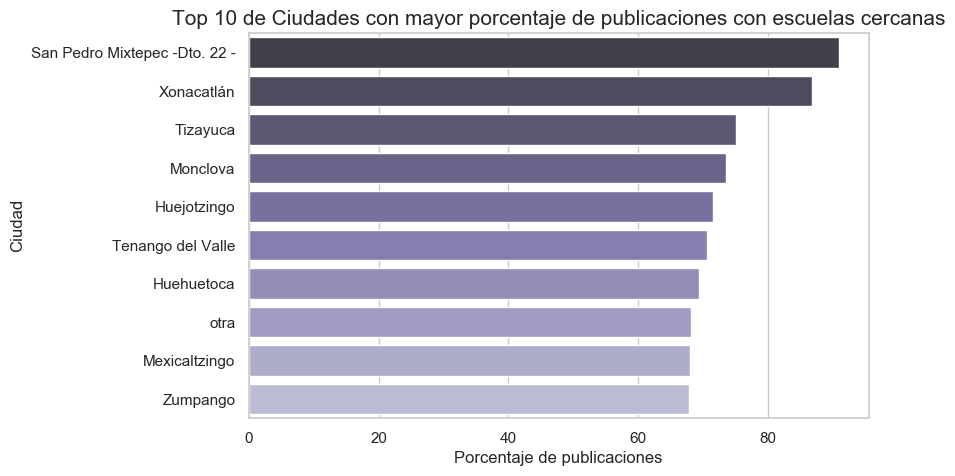

In [79]:
g = sns.barplot(y=porcentaje_escuelas_gb_ciudad_top10['ciudad_'], x=porcentaje_escuelas_gb_ciudad_top10['escuelascercanas_porcentaje'], \
                palette=sns.color_palette("Purples_d", 10));

g.set_title('Top 10 de Ciudades con mayor porcentaje de publicaciones con escuelas cercanas', fontsize=15);
g.set_xlabel('Porcentaje de publicaciones');
g.set_ylabel('Ciudad');

### Centros Comerciales Cercanos

In [80]:
dfZP['centroscomercialescercanos'].isnull().sum()

0

In [81]:
dfZP['centroscomercialescercanos'].value_counts()

0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64

In [82]:
dfZP['centroscomercialescercanos'] = dfZP['centroscomercialescercanos'].astype(bool)
dfZP['centroscomercialescercanos'].value_counts()

False    144832
True      95168
Name: centroscomercialescercanos, dtype: int64

#### Cantidad de publicaciones

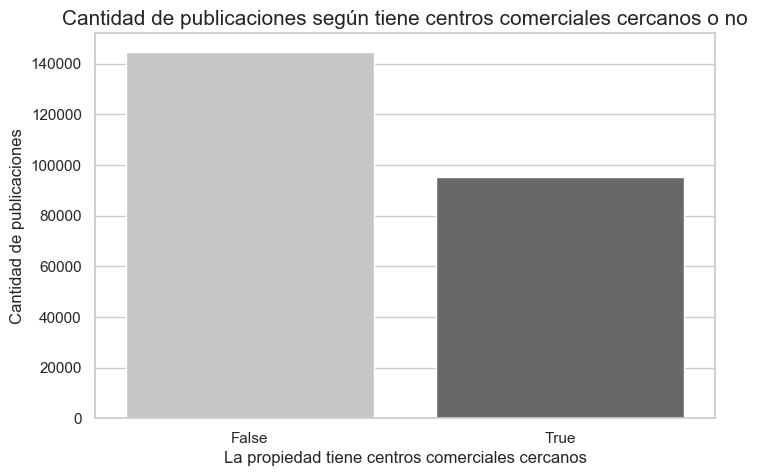

In [83]:
serie_publicacion_per_centros = dfZP['centroscomercialescercanos'].value_counts()

g = sns.barplot(y=serie_publicacion_per_centros.values, x=serie_publicacion_per_centros.index, \
                palette=sns.color_palette("Greys", 2));
g.set_title('Cantidad de publicaciones según tiene centros comerciales cercanos o no', fontsize=15);
g.set_xlabel('La propiedad tiene centros comerciales cercanos');
g.set_ylabel('Cantidad de publicaciones');   

#### Precio promedio

In [84]:
avgprecio_per_centros = dfZP.groupby('centroscomercialescercanos').agg({'precio' : ['mean', 'max', 'min']})
avgprecio_per_centros

precio                      
                                    mean         max       min
centroscomercialescercanos                                    
False                       2.481760e+06  12525000.0  310000.0
True                        2.605529e+06  12521000.0  310000.0

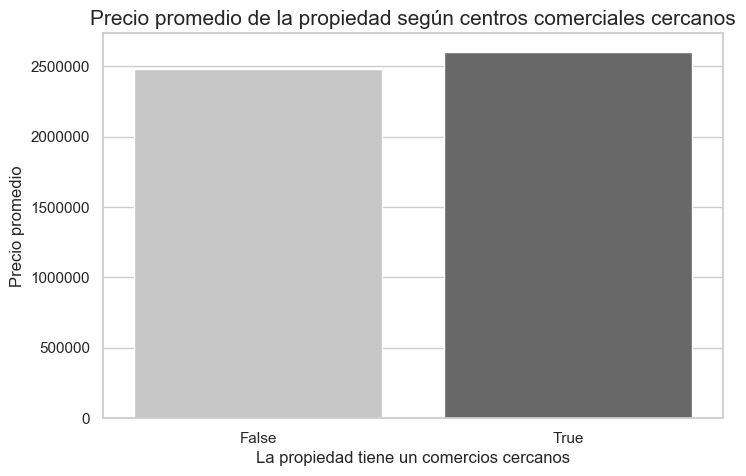

In [85]:
g = sns.barplot(x=avgprecio_per_centros.index, y=avgprecio_per_centros['precio']['mean'].values, \
                palette=sns.color_palette("Greys",2));
g.set_title('Precio promedio de la propiedad según centros comerciales cercanos', fontsize=15);
g.set_xlabel('La propiedad tiene un comercios cercanos');
g.set_ylabel('Precio promedio');

#### Tipo de Propiedad

In [86]:
per_centros = dfZP.loc[dfZP['centroscomercialescercanos'] == True]
per_centros['tipodepropiedad'].value_counts()

Casa                             54641
Apartamento                      25852
Casa en condominio                8869
Terreno                           3075
Local Comercial                    732
Oficina comercial                  508
Edificio                           438
Bodega comercial                   237
Casa uso de suelo                  224
Terreno comercial                  190
Departamento Compartido             94
Inmuebles productivos urbanos       88
Villa                               84
Local en centro comercial           80
Quinta Vacacional                   40
Rancho                              10
Huerta                               3
Duplex                               3
Name: tipodepropiedad, dtype: int64

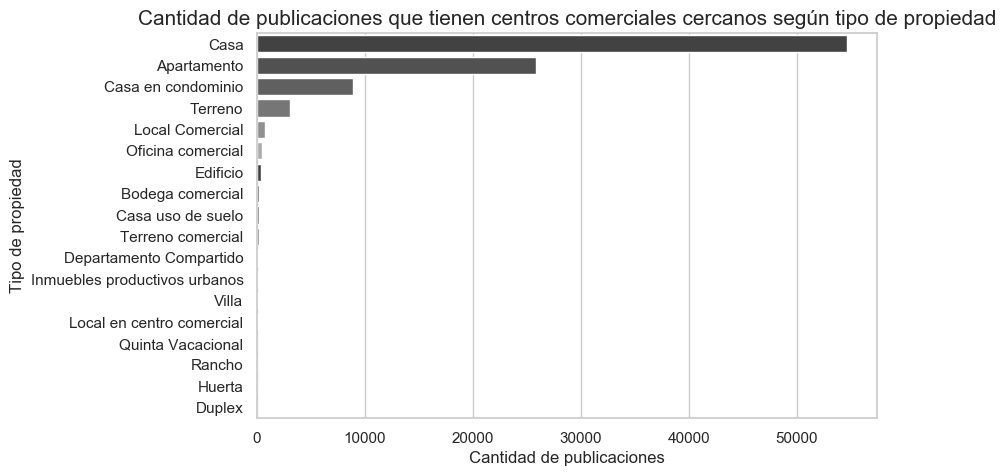

In [87]:
g = sns.barplot(x=per_centros['tipodepropiedad'].value_counts().values, y=per_centros['tipodepropiedad'].value_counts().index, \
                palette=sns.color_palette("Greys_d"));

g.set_title('Cantidad de publicaciones que tienen centros comerciales cercanos según tipo de propiedad', fontsize=15);
g.set_ylabel('Tipo de propiedad');
g.set_xlabel('Cantidad de publicaciones');

In [88]:
porcentaje_centros_gb_tipo = dfZP.groupby('tipodepropiedad').agg({'centroscomercialescercanos' : porcentaje}).reset_index()
porcentaje_centros_gb_tipo

,tipodepropiedad,centroscomercialescercanos
0,Apartamento,45.08
1,Bodega comercial,16.86
2,Casa,38.56
3,Casa en condominio,45.96
4,Casa uso de suelo,31.64
5,Departamento Compartido,66.67
6,Duplex,0.87
7,Edificio,31.38
8,Garage,0.00
9,Hospedaje,0.00


In [89]:
porcentaje_centros_mayor_a_1 = porcentaje_centros_gb_tipo.loc[porcentaje_centros_gb_tipo['centroscomercialescercanos'] > 1]
porcentaje_centros_mayor_a_1 = porcentaje_centros_mayor_a_1.sort_values(['centroscomercialescercanos'], ascending=[False])
porcentaje_centros_mayor_a_1

,tipodepropiedad,centroscomercialescercanos
5,Departamento Compartido,66.67
13,Local en centro comercial,48.48
3,Casa en condominio,45.96
0,Apartamento,45.08
11,Inmuebles productivos urbanos,44.00
2,Casa,38.56
4,Casa uso de suelo,31.64
7,Edificio,31.38
20,Terreno,30.92
16,Oficina comercial,29.18


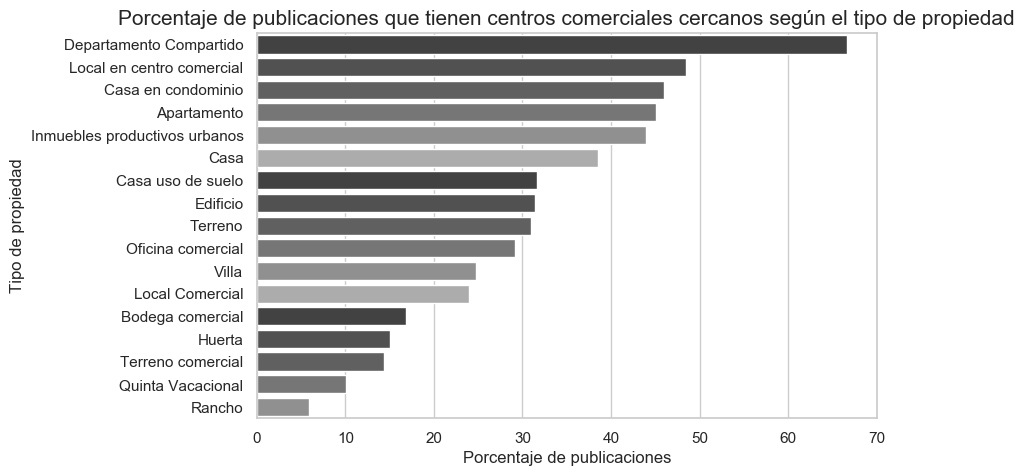

In [90]:
g = sns.barplot(x=porcentaje_centros_mayor_a_1['centroscomercialescercanos'], y=porcentaje_centros_mayor_a_1['tipodepropiedad'], \
                palette=sns.color_palette("Greys_d"));

g.set_title('Porcentaje de publicaciones que tienen centros comerciales cercanos según el tipo de propiedad', fontsize=15);
g.set_ylabel('Tipo de propiedad');
g.set_xlabel('Porcentaje de publicaciones');

#### Ciudad

In [91]:
per_centros['ciudad'].value_counts()

Benito Juárez                           5264
Querétaro                               5189
Zapopan                                 5033
Naucalpan de Juárez                     3632
Atizapán de Zaragoza                    3044
Alvaro Obregón                          2914
Cuauhtémoc                              2818
Coyoacán                                2567
Huixquilucan                            2553
Tlalpan                                 2544
Miguel Hidalgo                          2530
Puebla                                  2212
San Andrés Cholula                      2033
Cuautitlán Izcalli                      1894
Tlalnepantla de Baz                     1788
Guadalajara                             1746
Mérida                                  1741
Tlajomulco de Zúñiga                    1644
Cancún                                  1606
Monterrey                               1574
Gustavo A. Madero                       1416
Cuajimalpa de Morelos                   1415
Acapulco d

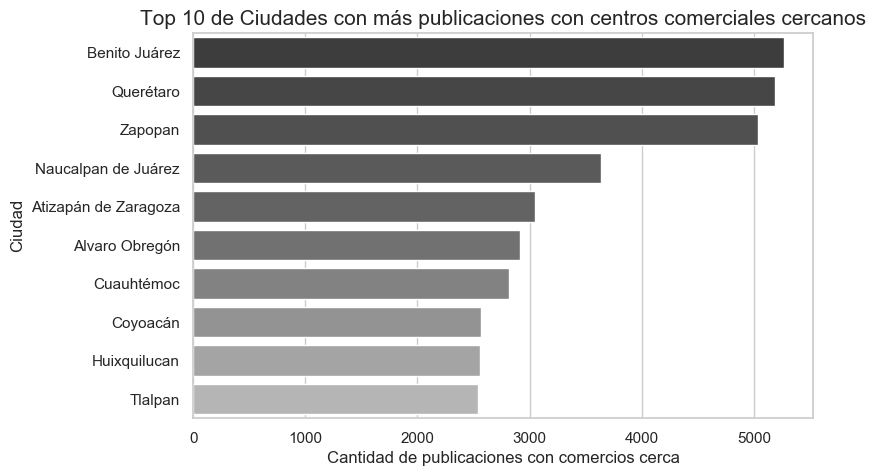

In [92]:
g = sns.barplot(y=per_centros['ciudad'].value_counts().head(10).index, x=per_centros['ciudad'].value_counts().head(10), \
                palette=sns.color_palette("Greys_d", 10));

g.set_title('Top 10 de Ciudades con más publicaciones con centros comerciales cercanos', fontsize=15);
g.set_xlabel('Cantidad de publicaciones con comercios cerca');
g.set_ylabel('Ciudad');

In [93]:
porcentaje_centros_gb_ciudad = dfZP.groupby('ciudad').agg({'centroscomercialescercanos' : [porcentaje, 'sum']}).reset_index()
level0 = porcentaje_centros_gb_ciudad.columns.get_level_values(0)
level1 = porcentaje_centros_gb_ciudad.columns.get_level_values(1)
porcentaje_centros_gb_ciudad.columns = level0 + '_' + level1
porcentaje_centros_gb_ciudad_top10 = porcentaje_centros_gb_ciudad.loc[porcentaje_centros_gb_ciudad['centroscomercialescercanos_sum'] >= 10].\
    sort_values(['centroscomercialescercanos_porcentaje'], ascending=[False]).head(10)
porcentaje_centros_gb_ciudad_top10

,ciudad_,centroscomercialescercanos_porcentaje,centroscomercialescercanos_sum
833,Xonacatlán,86.67,13.0
413,Mexicaltzingo,84.00,21.0
868,otra,68.18,15.0
858,Zihuatanejo de Azueta,63.89,92.0
322,Ixtapaluca,63.72,332.0
740,Tizayuca,63.35,140.0
303,Huehuetoca,62.44,261.0
867,Zumpango,61.54,128.0
513,Puerto Vallarta,60.70,505.0
409,Melchor Ocampo,60.00,24.0


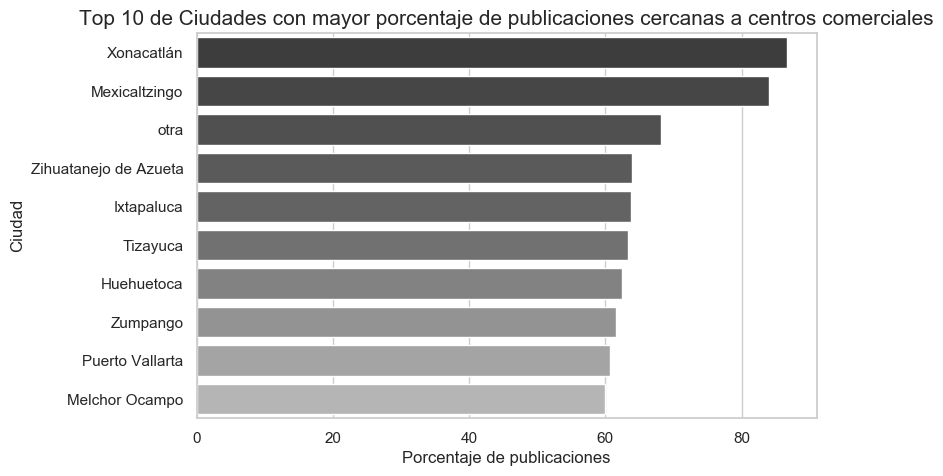

In [94]:
g = sns.barplot(y=porcentaje_centros_gb_ciudad_top10['ciudad_'], x=porcentaje_centros_gb_ciudad_top10['centroscomercialescercanos_porcentaje'], \
                palette=sns.color_palette("Greys_d", 10));

g.set_title('Top 10 de Ciudades con mayor porcentaje de publicaciones cercanas a centros comerciales', fontsize=15);
g.set_xlabel('Porcentaje de publicaciones');
g.set_ylabel('Ciudad');